In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

mnist = datasets.load_digits()

In [26]:
X = mnist['data']
y = mnist['target']

# Data Splitting

In [27]:
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_train

array([[ 0.        , -0.33742955, -0.04373842, ..., -0.64272461,
        -0.50287153, -0.20352724],
       [ 0.        , -0.33742955, -0.25185797, ...,  1.38492691,
         0.45203615, -0.20352724],
       [ 0.        , -0.33742955, -1.0843362 , ...,  0.03315923,
        -0.50287153, -0.20352724],
       ...,
       [ 0.        , -0.33742955, -0.45997753, ...,  1.21595595,
        -0.50287153, -0.20352724],
       [ 0.        ,  2.95365371,  2.03745715, ...,  0.87801403,
         1.64567076, -0.20352724],
       [ 0.        ,  0.7595982 ,  1.41309848, ...,  0.87801403,
        -0.26414461, -0.20352724]])

# Helper Functions

In [30]:
def conf_matrix_info(X_train_preds, y_scores):
    precision = precision_score(X_train_preds, y_scores, average='weighted')
    recall = recall_score(X_train_preds, y_scores, average='weighted')
    f1 = f1_score(X_train_preds, y_scores, average='weighted')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'f1: {f1}')

# OVR with SGD

In [31]:
sgd = SGDClassifier(random_state=42)
sgd_ovr_model = OneVsRestClassifier(sgd)

In [32]:
ovr_sgd_scores = cross_val_score(sgd_ovr_model, X_train, y_train, cv=5, scoring='accuracy')
print(ovr_sgd_scores)
print(ovr_sgd_scores.mean())

[0.94501718 0.94501718 0.94463668 0.9471831  0.94326241]
0.9450233104801855


In [33]:
ovr_sgd_predict_scores = cross_val_predict(sgd_ovr_model, X_train, y_train, cv=5, method='decision_function')
ovr_sgd_predict_scores

array([[-389.4931161 ,  -57.28847936, -104.91869051, ..., -186.30078853,
           4.79445109, -299.56202478],
       [-346.84795886,  -31.10082722,    9.18532973, ..., -308.28599304,
          -1.03664945, -138.05749405],
       [-378.03754898,   33.2073403 ,  -65.93433709, ..., -155.87524808,
         -25.94313663, -393.97025048],
       ...,
       [  76.62957609, -429.71542322, -312.42224172, ..., -345.4223084 ,
        -124.96805396, -115.08146875],
       [-530.22627819, -243.84316839,  306.81800751, ..., -372.38480036,
        -122.95862405, -346.04632665],
       [-374.66497065, -386.93758937, -167.74396264, ..., -376.61300331,
         -79.78183258,  -33.45000989]])

In [34]:
sgd_X_train_ovr_preds = []

for i in ovr_sgd_predict_scores:
    sgd_X_train_ovr_preds.append(i.argmax())

In [35]:
sgd_ovr_matrix = confusion_matrix(y_train, sgd_X_train_ovr_preds)

In [36]:
sgd_ovr_matrix

array([[141,   0,   0,   0,   0,   0,   2,   0,   1,   0],
       [  0, 129,   1,   1,   1,   0,   1,   0,   8,   4],
       [  0,   1, 133,   1,   0,   0,   0,   0,   3,   0],
       [  0,   0,   1, 130,   0,   2,   0,   2,   7,   1],
       [  1,   2,   0,   0, 150,   0,   0,   1,   2,   2],
       [  0,   1,   0,   1,   0, 135,   0,   0,   3,   4],
       [  0,   1,   0,   0,   0,   0, 141,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 133,   2,   1],
       [  0,   6,   0,   0,   0,   1,   0,   0, 136,   0],
       [  0,   1,   0,   3,   0,   1,   0,   1,   6, 130]])

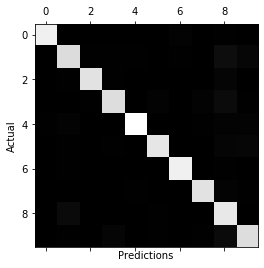

In [37]:
plt.matshow(sgd_ovr_matrix, cmap=plt.cm.gray)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [38]:
conf_matrix_info(sgd_X_train_ovr_preds, y_train)

Precision: 0.9454124491629717
Recall: 0.9450243562978428
f1: 0.9443443567972297


# OVO with SGD

In [39]:
sgd_ovo_model = OneVsOneClassifier(sgd)

### Cross Val Scores

In [40]:
scores = cross_val_score(sgd_ovo_model, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.96563574 0.95532646 0.95847751 0.95070423 0.97163121]
0.9603550277978211


### Cross Val Predict

In [41]:
ovo_sgd_scores = cross_val_predict(sgd_ovo_model, X_train, y_train, cv=5, method='decision_function')

In [42]:
ovo_sgd_pred = []

for i in ovo_sgd_scores:
    ovo_sgd_pred.append(i.argmax())

In [43]:
ovo_sgd_matrix = confusion_matrix(y_train, ovo_sgd_pred)
ovo_sgd_matrix

array([[141,   0,   0,   0,   1,   0,   2,   0,   0,   0],
       [  0, 139,   1,   0,   1,   0,   0,   0,   1,   3],
       [  0,   0, 135,   0,   0,   0,   0,   0,   3,   0],
       [  0,   0,   2, 137,   0,   1,   0,   0,   3,   0],
       [  1,   1,   0,   0, 151,   0,   0,   1,   1,   3],
       [  1,   0,   1,   1,   0, 138,   1,   1,   0,   1],
       [  0,   1,   0,   0,   0,   0, 140,   0,   2,   0],
       [  0,   0,   1,   0,   0,   0,   0, 134,   1,   1],
       [  0,   6,   1,   0,   1,   2,   1,   1, 129,   2],
       [  0,   1,   0,   0,   0,   1,   0,   1,   3, 136]])

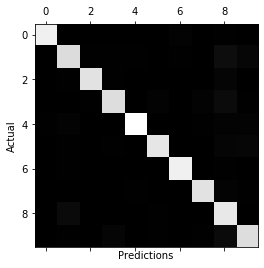

In [44]:
plt.matshow(sgd_ovr_matrix, cmap=plt.cm.gray)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [45]:
conf_matrix_info(ovo_sgd_pred, y_train)

Precision: 0.9603966080920573
Recall: 0.9603340292275574
f1: 0.9602705939938031
